# Data Preparation

In [1]:
import pandas as pd
database_name = "crabnet-hyperparameter"
collection_name = "sobol"
df = pd.read_csv(f"../../data/external/{database_name}-{collection_name}.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58534 entries, 0 to 58533
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                58534 non-null  object 
 1   N                  58534 non-null  int64  
 2   alpha              58534 non-null  float64
 3   d_model            58534 non-null  int64  
 4   dim_feedforward    58534 non-null  int64  
 5   dropout            58534 non-null  float64
 6   emb_scaler         58534 non-null  float64
 7   eps                58534 non-null  float64
 8   epochs_step        58534 non-null  int64  
 9   fudge              58534 non-null  float64
 10  heads              58534 non-null  int64  
 11  k                  58534 non-null  int64  
 12  lr                 58534 non-null  float64
 13  pe_resolution      58534 non-null  int64  
 14  ple_resolution     58534 non-null  int64  
 15  pos_scaler         58534 non-null  float64
 16  weight_decay       585

In [3]:
import plotly.express as px

In [4]:
import json
df["scores"] = df["scores"].apply(json.loads)

In [5]:
# extract the "mean" of the "mae" of the dict
df["mae"] = df["scores"].apply(lambda x: x["mae"]["mean"])
df["rmse"] = df["scores"].apply(lambda x: x["rmse"]["mean"])

In [37]:
df["model_size"] = df["model_size"].astype(float)

In [6]:
fig = px.histogram(df, x="mae", width=400, height=400)
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20), font=dict(size=16))

In [7]:
fig = px.histogram(df, x="rmse", width=400, height=400)
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20), font=dict(size=16))

In [8]:
fig = px.histogram(df, x="model_size", width=400, height=400)
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20), font=dict(size=16))

In [9]:
fig = px.histogram(df, x="runtime", width=400, height=400)
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20), font=dict(size=16))
fig.update_xaxes(title_text="RTX 2080-Ti Runtime (s)")

In [38]:
df.columns

Index(['_id', 'N', 'alpha', 'd_model', 'dim_feedforward', 'dropout',
       'emb_scaler', 'eps', 'epochs_step', 'fudge', 'heads', 'k', 'lr',
       'pe_resolution', 'ple_resolution', 'pos_scaler', 'weight_decay',
       'batch_size', 'out_hidden4', 'betas1', 'betas2', 'bias', 'train_frac',
       'criterion', 'elem_prop', 'hardware', 'sample_seed', 'scores',
       'model_size', 'runtime', 'session_id', 'timestamp', 'date',
       'sobol_seed', 'num_sobol_samples', 'num_repeats', 'mae', 'rmse'],
      dtype='object')

In [39]:
by_lbls = [
    "N",
    "alpha",
    "d_model",
    "dim_feedforward",
    "dropout",
    "emb_scaler",
    "eps",
    "epochs_step",
    "fudge",
    "heads",
    "k",
    "lr",
    "pe_resolution",
    "ple_resolution",
    "pos_scaler",
    "weight_decay",
    "batch_size",
    "out_hidden4",
    "betas1",
    "betas2",
    "bias",
    "train_frac",
    "criterion",
    "elem_prop",
    "hardware",
]

grp = df.round(decimals=6).groupby(by=by_lbls, dropna=False, as_index=False)
counts = grp.count()["session_id"]

In [40]:
fig = px.histogram(counts, x="session_id", nbins=50, width=400, height=400)
# tighten margins
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))
fig.update_xaxes(title_text="number of successful repeats")
fig.update_yaxes(title_text="number of groups")
fig.update_layout(font_size=16)
# save figure
fig.write_image("../../reports/crabnet_hyperparameter/figures/sobol_repeats_histogram.png")
# save html
fig.write_html("../../reports/crabnet_hyperparameter/figures/sobol_repeats_histogram.html")
fig

In [41]:
rank_df = grp.rank(method="dense", pct=True).loc[
    :, ["mae", "rmse", "runtime", "model_size"]
]

/var/folders/hd/ck7ccldx4wl6tt57ksvprc480000gn/T/ipykernel_36971/1576118940.py:1: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.rank is deprecated. In a future version, a TypeError will be raised. Before calling .rank, select only columns which should be valid for the function.



<AxesSubplot: >

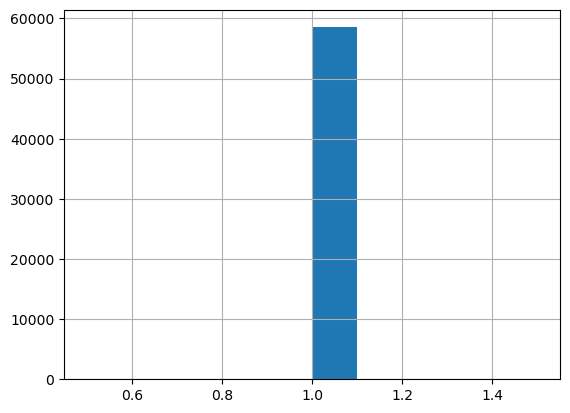

In [42]:
rank_df["model_size"].hist()

In [43]:
df["model_size"].min()

1.0

In [44]:
df["model_size"].max()

63.18564582108557

In [45]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58534 entries, 0 to 58533
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                58534 non-null  object 
 1   N                  58534 non-null  int64  
 2   alpha              58534 non-null  float64
 3   d_model            58534 non-null  int64  
 4   dim_feedforward    58534 non-null  int64  
 5   dropout            58534 non-null  float64
 6   emb_scaler         58534 non-null  float64
 7   eps                58534 non-null  float64
 8   epochs_step        58534 non-null  int64  
 9   fudge              58534 non-null  float64
 10  heads              58534 non-null  int64  
 11  k                  58534 non-null  int64  
 12  lr                 58534 non-null  float64
 13  pe_resolution      58534 non-null  int64  
 14  ple_resolution     58534 non-null  int64  
 15  pos_scaler         58534 non-null  float64
 16  weight_decay       585